# Bài tập 2 - Thống kê mô tả

*(Thống kê máy tính và ứng dụng - ĐTTX Kì 2 2022-2023)*

MSSV: 21880005

Họ và tên: Pham Tuan Anh

**Trực quan hóa dữ liệu** (data visualization) là công đoạn rất quan trọng trong phân tích dữ liệu với mục đích chính là **khám phá** (explore) và **mô tả** (describe) dữ liệu. Đây là phần quan trọng trong **phân tích thăm dò dữ liệu** (Exploratory Data Analysis) hay **thống kê mô tả** (Descriptive Statistics).

**Matplotlib** (https://matplotlib.org/) là thư viện trực quan hóa phổ biến trong Python. **seaborn** (https://seaborn.pydata.org/) là thư viện trực quan cao cấp được xây dựng dựa trên matplotlib.

Các **số đo tóm tắt dữ liệu** (summary statistic) cũng là công cụ hay được dùng trong thống kê mô tả.

NumPy (https://numpy.org/), pandas (https://pandas.pydata.org/), SciPy (https://scipy.org/) hỗ trợ đầy đủ việc tính toán các số đo này.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport as pp

### Câu 1 (2 điểm)

Vẽ đồ thị các hàm số sau trên khoảng $[-2, 2]$
1. $y = x$
1. $y = x^2$
1. $y = |x|$ 

trên cùng một hệ biểu đồ (hệ trục) hay riêng lẻ trên từng biểu đồ. Thử dùng các style khác nhau mà matplotlib hỗ trợ.

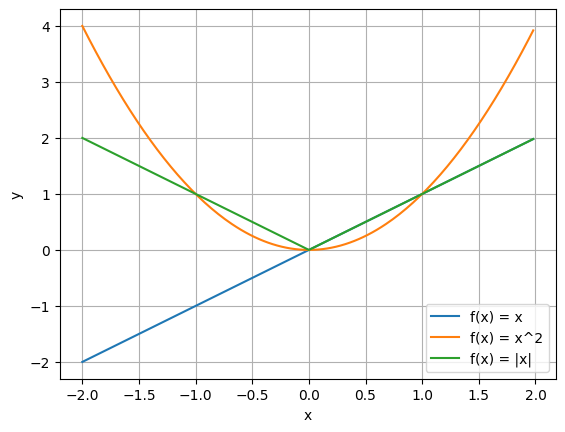

In [5]:
X = np.arange(-2,2,0.02)
fig = plt.figure()

Y = X
Y2= X**2
Y3= abs(X)
plt.plot(X,Y,label='f(x) = x')
plt.plot(X,Y2,label='f(x) = x^2')
plt.plot(X,Y3,label='f(x) = |x|')
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()

### Bộ dữ liệu `Titanic`

Dữ liệu `Titanic Dataset`: https://vincentarelbundock.github.io/Rdatasets/datasets.html, https://vincentarelbundock.github.io/Rdatasets/csv/carData/TitanicSurvival.csv

Tham khảo: https://vincentarelbundock.github.io/Rdatasets/doc/carData/TitanicSurvival.html.

In [6]:
titanic = pd.read_csv("TitanicSurvival.csv")
titanic

,Unnamed: 0,survived,sex,age,passengerClass
0,"Allen, Miss. Elisabeth Walton",yes,female,29.0000,1st
1,"Allison, Master. Hudson Trevor",yes,male,0.9167,1st
2,"Allison, Miss. Helen Loraine",no,female,2.0000,1st
3,"Allison, Mr. Hudson Joshua Crei",no,male,30.0000,1st
4,"Allison, Mrs. Hudson J C (Bessi",no,female,25.0000,1st
...,...,...,...,...,...
1304,"Zabour, Miss. Hileni",no,female,14.5000,3rd
1305,"Zabour, Miss. Thamine",no,female,NaN,3rd
1306,"Zakarian, Mr. Mapriededer",no,male,26.5000,3rd
1307,"Zakarian, Mr. Ortin",no,male,27.0000,3rd


Bỏ cột đầu tiên (cột tên)

In [7]:
try:
    titanic.drop("Unnamed: 0", axis=1, inplace=True)
except:
    pass

titanic

,survived,sex,age,passengerClass
0,yes,female,29.0000,1st
1,yes,male,0.9167,1st
2,no,female,2.0000,1st
3,no,male,30.0000,1st
4,no,female,25.0000,1st
...,...,...,...,...
1304,no,female,14.5000,3rd
1305,no,female,NaN,3rd
1306,no,male,26.5000,3rd
1307,no,male,27.0000,3rd


In [8]:
titanic.isna().sum()

survived            0
sex                 0
age               263
passengerClass      0
dtype: int64

Cột age có 263 NaN.

In [9]:
titanic.describe()

,age
count,1046.000000
mean,29.881135
std,14.413500
min,0.166700
25%,21.000000
50%,28.000000
75%,39.000000
max,80.000000


In [10]:
titanic.survived.describe()

count     1309
unique       2
top         no
freq       809
Name: survived, dtype: object

### Câu 2 (1 điểm)

1. Vẽ biểu đồ quạt cho biết tần số các nhóm của hạng hành khách (passengerClass) trong bộ dữ liệu Titanic.
1. Vẽ biểu đồ thanh cho biết tần số các nhóm của hạng hành khách.

Chuẩn bi dữ lieu

In [11]:

# plt.pie(titanic['passengerClass'])
# passenger = titanic['passengerClass'].unique()
#Define color to use
colors = sns.color_palette("cubehelix", as_cmap=True)
passenger = pd.Series(titanic['passengerClass']).value_counts().sort_index().reset_index().reset_index(drop=True)
passenger.columns = ['Labels', 'Size']
total = passenger['Size'].sum()
passenger['Percentage'] = passenger['Size']/total
passenger

,Labels,Size,Percentage
0,1st,323,0.246753
1,2nd,277,0.211612
2,3rd,709,0.541635


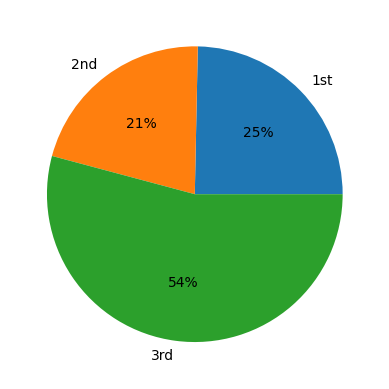

In [12]:
fig, ax = plt.subplots()
ax.pie(passenger["Size"],labels=passenger['Labels'],autopct='%.0f%%')

plt.show()

In [13]:
# help(pd.DataFrame.plot)

<AxesSubplot: xlabel='passengerClass'>

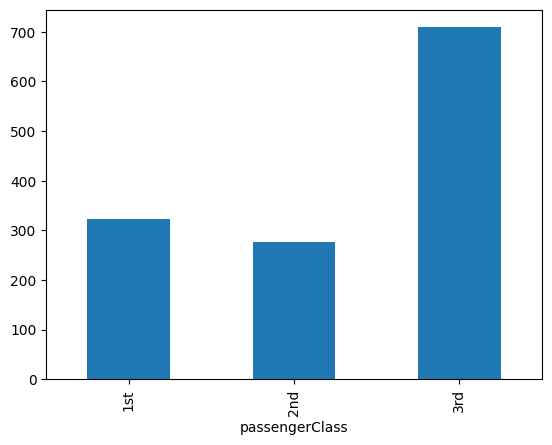

In [14]:
titanic.groupby('passengerClass').size().plot(kind='bar')

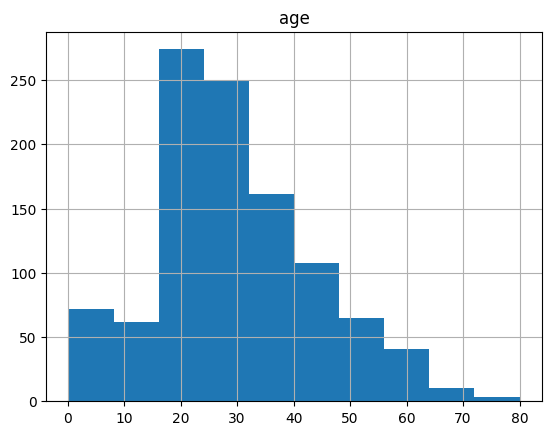

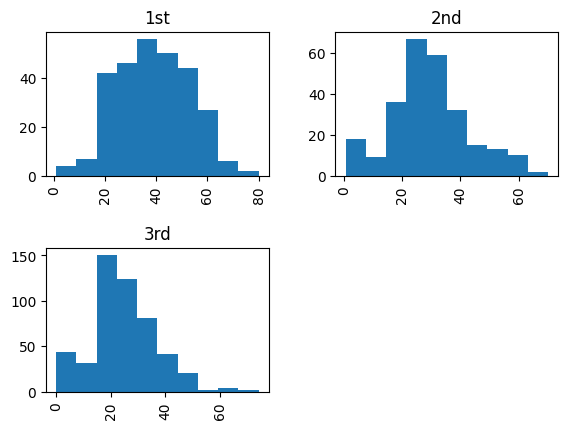

In [15]:
titanic.hist()
titanic.hist(by='passengerClass')
plt.show()

In [16]:
age_Class_df = titanic[['age','passengerClass']].dropna()
age_Class_df.sort_values(by='age').head()

,age,passengerClass
763,0.1667,3rd
747,0.3333,3rd
1240,0.4167,3rd
427,0.6667,2nd
1111,0.7500,3rd


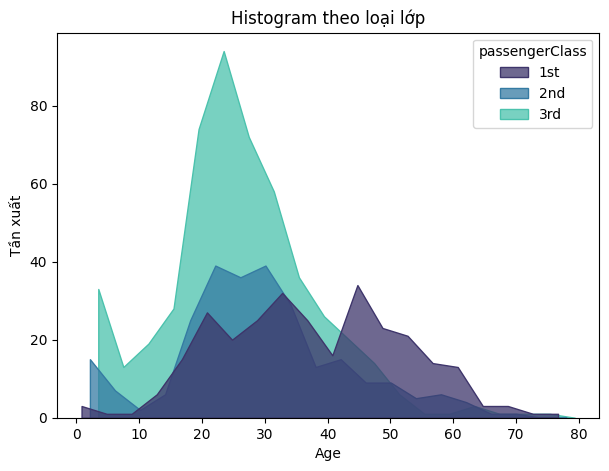

In [17]:
f = plt.figure(figsize=(7,5))
ax = f.add_subplot(1,1,1)


sns.histplot(data=age_Class_df,ax=ax,stat='count',multiple='dodge',x='age',palette="mako",hue='passengerClass',element='poly',legend='True',bins=20)
ax.set_title('Histogram theo loại lớp')
ax.set_xlabel('Age')
ax.set_ylabel("Tần xuất")
ax.set_label(['Sống','Chết'])

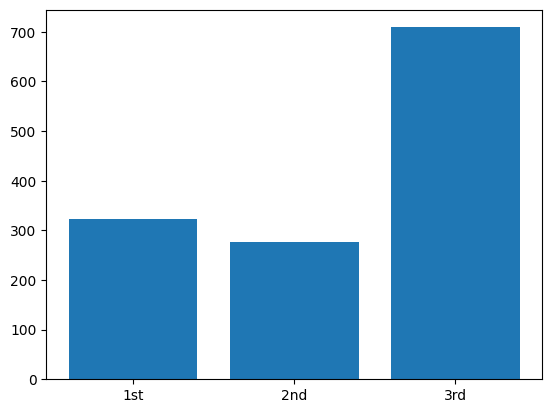

In [18]:
fig, ax = plt.subplots()
ax.bar(x=passenger['Labels'],height=passenger['Size'])
plt.show()

### Câu 3 (1 điểm)

1. Vẽ biểu đồ thanh gom nhóm cho tần số sống chết (survived) chia theo hạng hành khách. 
1. Vẽ biểu đồ thanh xếp chồng cho tần số sống chết chia theo hạng hành khách.

In [19]:
titanic.head()

,survived,sex,age,passengerClass
0,yes,female,29.0000,1st
1,yes,male,0.9167,1st
2,no,female,2.0000,1st
3,no,male,30.0000,1st
4,no,female,25.0000,1st


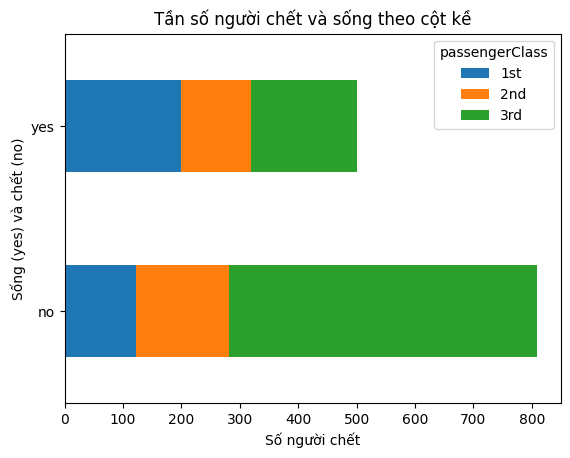

In [20]:

summary_survived=titanic.groupby(['survived','passengerClass']).size().unstack().plot(kind='barh',stacked=True,xlabel='Số người chết',title='Tần số người chết và sống theo cột kề',ylabel='Sống (yes) và chết (no)')

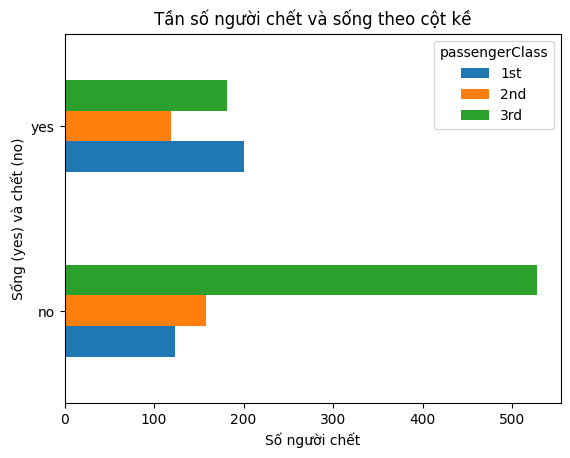

In [21]:
summary_survived=titanic.groupby(['survived','passengerClass']).size().unstack().plot(kind='barh',stacked=False,xlabel='Số người chết',title='Tần số người chết và sống theo cột kề',ylabel='Sống (yes) và chết (no)')

### Câu 4 (1 điểm)

1. Vẽ histogram cho tuổi (age) với các khoảng chia đều.
1. Vẽ histogram cho tuổi với các khoảng chia không đều: 0 - 5 - 20 - 30 - 40 - 60 - 80.

array([[<AxesSubplot: title={'center': 'age'}>]], dtype=object)

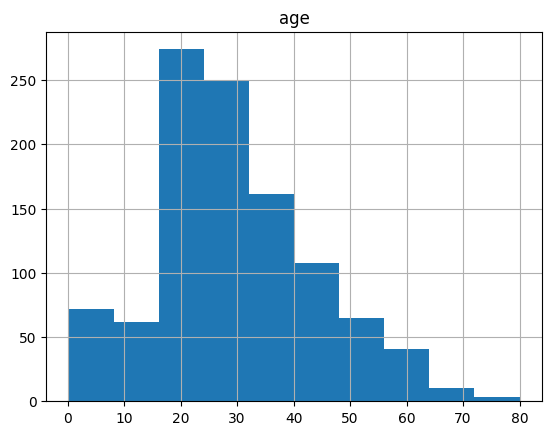

In [22]:
titanic.hist()

array([[<AxesSubplot: title={'center': 'age'}>]], dtype=object)

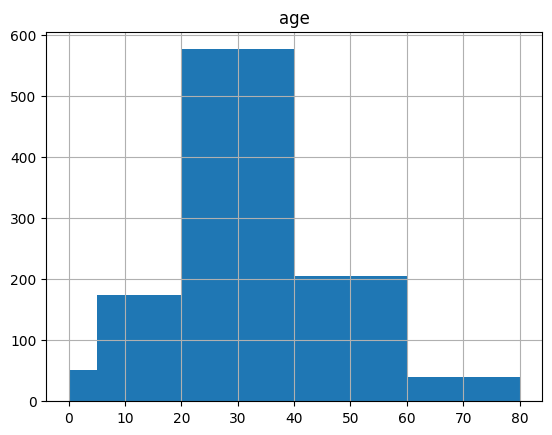

In [23]:
space=[0,5,20,40,60,80]
titanic.hist(bins=space)

### Câu 5 (1 điểm)

1. Vẽ histogram kề cho tuổi theo nhóm sống chết.
1. Vẽ histogram xếp chồng cho tuổi theo nhóm sống chết.

In [24]:
survived_data = titanic.dropna()[['age','survived']]
survived_data.head()

,age,survived
0,29.0000,yes
1,0.9167,yes
2,2.0000,no
3,30.0000,no
4,25.0000,no


In [25]:
help(sns.histplot)

Help on function histplot in module seaborn.distributions:

histplot(data=None, *, x=None, y=None, hue=None, weights=None, stat='count', bins='auto', binwidth=None, binrange=None, discrete=None, cumulative=False, common_bins=True, common_norm=True, multiple='layer', element='bars', fill=True, shrink=1, kde=False, kde_kws=None, line_kws=None, thresh=0, pthresh=None, pmax=None, cbar=False, cbar_ax=None, cbar_kws=None, palette=None, hue_order=None, hue_norm=None, color=None, log_scale=None, legend=True, ax=None, **kwargs)
    Plot univariate or bivariate histograms to show distributions of datasets.
    
    A histogram is a classic visualization tool that represents the distribution
    of one or more variables by counting the number of observations that fall within
    discrete bins.
    
    This function can normalize the statistic computed within each bin to estimate
    frequency, density or probability mass, and it can add a smooth curve obtained
    using a kernel density estimate

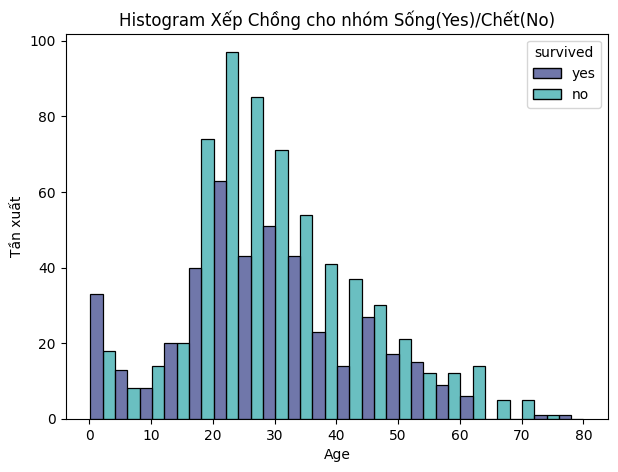

In [26]:
f = plt.figure(figsize=(7,5))
ax = f.add_subplot(1,1,1)


sns.histplot(data=survived_data,ax=ax,stat='count',multiple='dodge',x='age',palette="mako",hue='survived',element='bars',legend='True',bins=20)
ax.set_title('Histogram Xếp Chồng cho nhóm Sống(Yes)/Chết(No)')
ax.set_xlabel('Age')
ax.set_ylabel("Tần xuất")
ax.set_label(['Sống','Chết'])

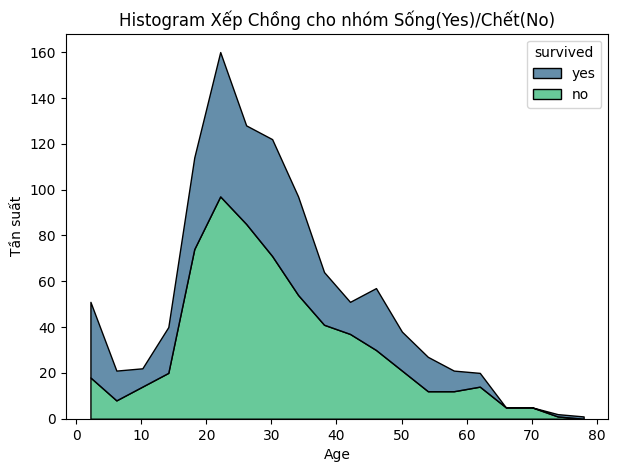

In [27]:
f = plt.figure(figsize=(7,5))
ax = f.add_subplot(1,1,1)
survived_data = titanic.dropna()[['age','survived']]

sns.histplot(data=survived_data,ax=ax,stat='count',multiple='stack',x='age',palette="viridis",hue='survived',element='poly',legend='True',bins=20)
ax.set_title('Histogram Xếp Chồng cho nhóm Sống(Yes)/Chết(No)')
ax.set_xlabel('Age')
ax.set_ylabel("Tần suất")
ax.set_label(['Sống','Chết'])

### Câu 6 (1 điểm)

1. Dùng histogram kiểm tra xem tuổi có ngoại lai hay không? 
1. Dùng boxplot kiểm tra xem tuổi có ngoại lai hay không?
1. Tính trung bình, trung vị của tuổi và so sánh.

In [28]:
help(pd.DataFrame.hist)

Help on function hist_frame in module pandas.plotting._core:

hist_frame(data: 'DataFrame', column: 'IndexLabel' = None, by=None, grid: 'bool' = True, xlabelsize: 'int | None' = None, xrot: 'float | None' = None, ylabelsize: 'int | None' = None, yrot: 'float | None' = None, ax=None, sharex: 'bool' = False, sharey: 'bool' = False, figsize: 'tuple[int, int] | None' = None, layout: 'tuple[int, int] | None' = None, bins: 'int | Sequence[int]' = 10, backend: 'str | None' = None, legend: 'bool' = False, **kwargs)
    Make a histogram of the DataFrame's columns.
    
    A `histogram`_ is a representation of the distribution of data.
    This function calls :meth:`matplotlib.pyplot.hist`, on each series in
    the DataFrame, resulting in one histogram per column.
    
    .. _histogram: https://en.wikipedia.org/wiki/Histogram
    
    Parameters
    ----------
    data : DataFrame
        The pandas object holding the data.
    column : str or sequence, optional
        If passed, will be use

array([<AxesSubplot: title={'center': 'no'}>,
       <AxesSubplot: title={'center': 'yes'}>], dtype=object)

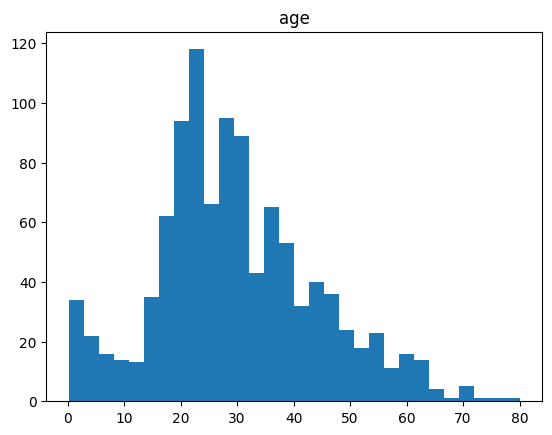

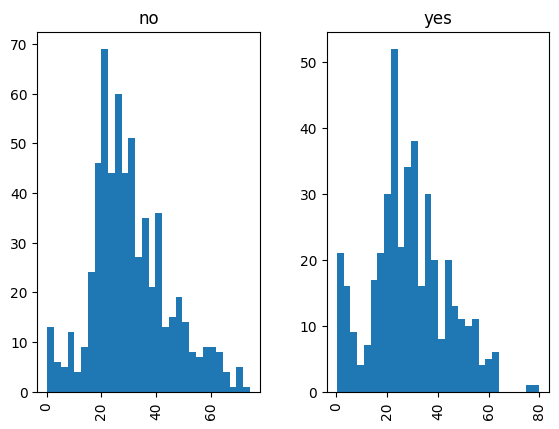

In [29]:
titanic.dropna().hist('age',bins=30,grid=False)
titanic.dropna().hist('age',bins=30,grid=False,by='survived')

In [30]:
help(pd.DataFrame.dropna)

Help on function dropna in module pandas.core.frame:

dropna(self, *, axis: 'Axis' = 0, how: 'str | NoDefault' = <no_default>, thresh: 'int | NoDefault' = <no_default>, subset: 'IndexLabel' = None, inplace: 'bool' = False) -> 'DataFrame | None'
    Remove missing values.
    
    See the :ref:`User Guide <missing_data>` for more on which values are
    considered missing, and how to work with missing data.
    
    Parameters
    ----------
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Determine if rows or columns which contain missing values are
        removed.
    
        * 0, or 'index' : Drop rows which contain missing values.
        * 1, or 'columns' : Drop columns which contain missing value.
    
        .. versionchanged:: 1.0.0
    
           Pass tuple or list to drop on multiple axes.
           Only a single axis is allowed.
    
    how : {'any', 'all'}, default 'any'
        Determine if row or column is removed from DataFrame, when we have
        at l

<AxesSubplot: title={'center': 'age'}, xlabel='passengerClass'>

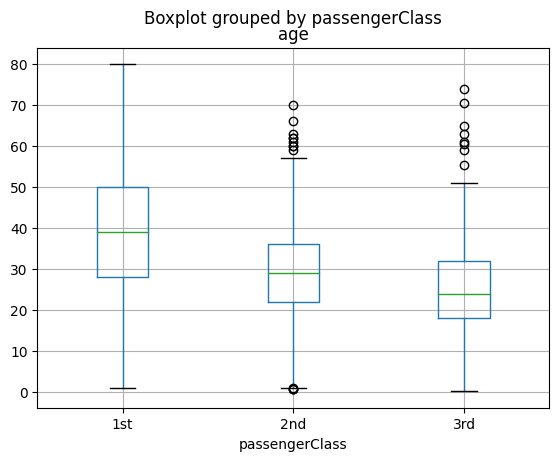

In [31]:
titanic.boxplot('age',by='passengerClass')

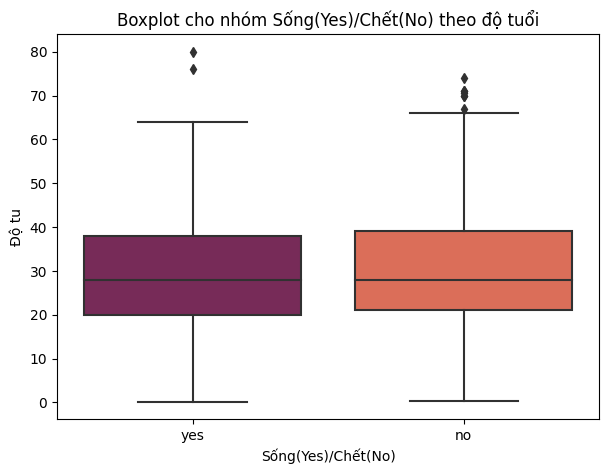

In [32]:
f = plt.figure(figsize=(7,5))
ax = f.add_subplot(1,1,1)


sns.boxplot(x=survived_data['survived'],y=survived_data['age'],palette='rocket')
ax.set_title('Boxplot cho nhóm Sống(Yes)/Chết(No) theo độ tuổi')
ax.set_xlabel('Sống(Yes)/Chết(No)')
ax.set_ylabel("Độ tu")
ax.set_label(['Sống','Chết'])

<li class='text-primary' color='green'>Theo biểu đồ boxplot trên cho thấy với nhóm còn song: phân bố đ khoan 60-70 tuoi</li>

In [33]:
# help(sns.boxplot)

In [34]:
# help(pp.to_file)

In [35]:
profile = pp(titanic.dropna())
profile.to_file('profile.html')


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/ydata_profiling/utils/dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Câu 7 (1 điểm)

1. Tính các số đo tóm tắt hay dùng cho tuổi.
1. Tính các số đo tóm tắt hay dùng cho tuổi chia theo nhóm sống chết. 

#### Cau a

In [82]:
titanic.age.describe()



count    1046.000000
mean       29.881135
std        14.413500
min         0.166700
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: age, dtype: float64

#### Cau b

In [83]:
titanic.groupby('survived').age.describe()


,count,mean,std,min,25%,50%,75%,max
survived,,,,,,,,
no,619.0,30.545369,13.922539,0.3333,21.0,28.0,39.0,74.0
yes,427.0,28.918228,15.061481,0.1667,20.0,28.0,38.0,80.0


### Câu 8 (3 điểm)
Tập tin `WHO-COVID-19-global-data.csv` chứa dữ liệu số lượng ca nhiễm và chết do COVID-19 của các nước từ đầu năm 2020 đến hết tháng 3 năm 2023 (nguồn WHO: https://covid19.who.int/WHO-COVID-19-global-data.csv).

Tham khảo: https://covid19.who.int/, https://covid19.who.int/data.

1.	"Trích và mô tả" dữ liệu của Việt Nam (mã quốc gia là VN).
1.	<mark>Cộng điểm</mark> "So sánh" dữ liệu của Việt Nam với Thái Land (mã quốc gia là TH).

In [176]:
df = pd.read_csv("WHO-COVID-19-global-data.csv",parse_dates=['Date_reported'])
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


Cleanup data <br>
<ol type="1">
<li>EDA data</li>
<li>Cleanup</li>
<li>prepare data</li>
<li>Visualization</li>
</ol>

In [177]:
world_profile = pp(df)
world_profile.to_file('world_profile.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Mô Tả Việt Nam

In [190]:

df_vn=df[df['Country_code']=='VN']
df_vn=df_vn[['Date_reported','New_cases','New_deaths']]
df_vn_format=df_vn.melt('Date_reported', var_name='Type', value_name='Case')
df_vn
df_vn.head()

,Date_reported,New_cases,New_deaths
272368,2020-01-03,0,0
272369,2020-01-04,0,0
272370,2020-01-05,0,0
272371,2020-01-06,0,0
272372,2020-01-07,0,0


In [179]:
df_vn.dtypes

Date_reported    datetime64[ns]
New_cases                 int64
dtype: object

In [180]:
profile_vn=pp(df_vn)

Mô Tả Diễn Biến d tại VN

In [181]:
df_vn['New_cases'].describe()

count      1174.000000
mean       9818.687394
std       37945.876168
min           0.000000
25%           3.000000
50%          82.000000
75%        3594.000000
max      454212.000000
Name: New_cases, dtype: float64

In [212]:
help(df.sum)

Help on method sum in module pandas.core.generic:

sum(axis=None, skipna=True, level=None, numeric_only=None, min_count=0, **kwargs) method of pandas.core.frame.DataFrame instance
    Return the sum of the values over the requested axis.
    
    This is equivalent to the method ``numpy.sum``.
    
    Parameters
    ----------
    axis : {index (0), columns (1)}
        Axis for the function to be applied on.
        For `Series` this parameter is unused and defaults to 0.
    skipna : bool, default True
        Exclude NA/null values when computing the result.
    level : int or level name, default None
        If the axis is a MultiIndex (hierarchical), count along a
        particular level, collapsing into a Series.
    
        .. deprecated:: 1.3.0
            The level keyword is deprecated. Use groupby instead.
    numeric_only : bool, default None
        Include only float, int, boolean columns. If None, will attempt to use
        everything, then use only numeric data. Not

In [182]:
help(sns.barplot)

Help on function barplot in module seaborn.categorical:

barplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, estimator='mean', errorbar=('ci', 95), n_boot=1000, units=None, seed=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, errcolor='.26', errwidth=None, capsize=None, dodge=True, ci='deprecated', ax=None, **kwargs)
    Show point estimates and errors as rectangular bars.
    
    A bar plot represents an estimate of central tendency for a numeric
    variable with the height of each rectangle and provides some indication of
    the uncertainty around that estimate using error bars. Bar plots include 0
    in the quantitative axis range, and they are a good choice when 0 is a
    meaningful value for the quantitative variable, and you want to make
    comparisons against it.
    
    For datasets where 0 is not a meaningful value, a point plot will allow you
    to focus on differences between levels of one or more categorical
    varia

In [210]:
import datetime

In [218]:
df_vn = MonthYear =lambda x: df_vn['Date_reported'].str('%b %y')


AttributeError: Can only use .str accessor with string values!

In [215]:
df_vn.head()

,Date_reported,New_cases,New_deaths,Month-Year
272368,2020-01-03,0,0,<function <lambda> at 0x2af05afc0>
272369,2020-01-04,0,0,<function <lambda> at 0x2af05afc0>
272370,2020-01-05,0,0,<function <lambda> at 0x2af05afc0>
272371,2020-01-06,0,0,<function <lambda> at 0x2af05afc0>
272372,2020-01-07,0,0,<function <lambda> at 0x2af05afc0>


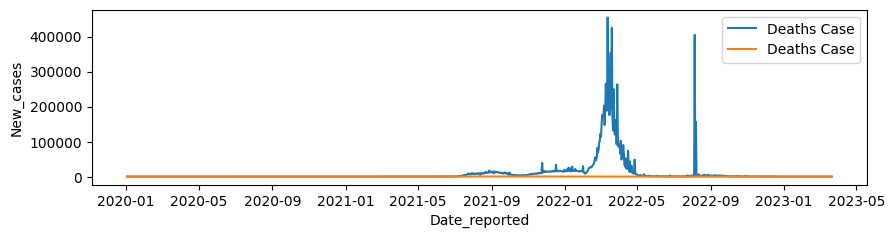

In [207]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(2,1,2)
dateformat = df_vn.groupby('Month-Year').sum()
sns.lineplot(df_vn,y='New_cases',x='Date_reported',ax=ax,label='Deaths Case')
sns.lineplot(df_vn,y='New_deaths',x='Date_reported',ax=ax,label="Deaths Case")
ax.set_xlim(date(1,1,1))
ax.legend()

In [185]:
help(sns.histplot)

Help on function histplot in module seaborn.distributions:

histplot(data=None, *, x=None, y=None, hue=None, weights=None, stat='count', bins='auto', binwidth=None, binrange=None, discrete=None, cumulative=False, common_bins=True, common_norm=True, multiple='layer', element='bars', fill=True, shrink=1, kde=False, kde_kws=None, line_kws=None, thresh=0, pthresh=None, pmax=None, cbar=False, cbar_ax=None, cbar_kws=None, palette=None, hue_order=None, hue_norm=None, color=None, log_scale=None, legend=True, ax=None, **kwargs)
    Plot univariate or bivariate histograms to show distributions of datasets.
    
    A histogram is a classic visualization tool that represents the distribution
    of one or more variables by counting the number of observations that fall within
    discrete bins.
    
    This function can normalize the statistic computed within each bin to estimate
    frequency, density or probability mass, and it can add a smooth curve obtained
    using a kernel density estimate

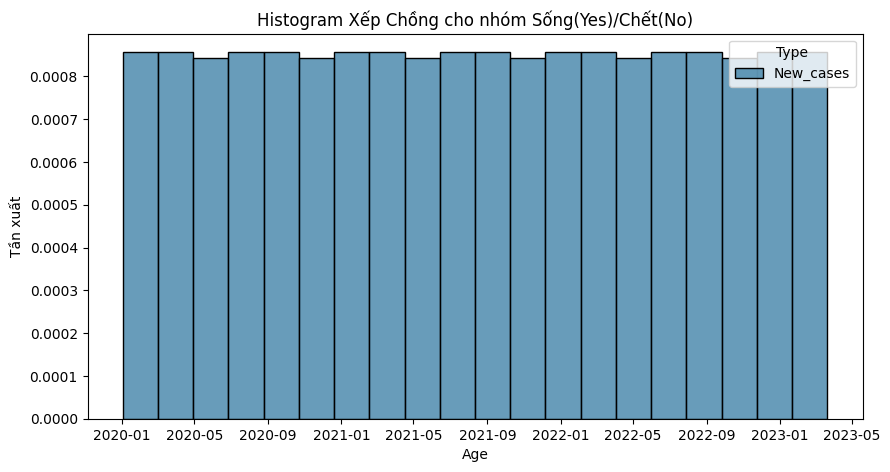

In [189]:
f = plt.figure(figsize=(10,5))
ax = f.add_subplot(1,1,1)


sns.histplot(data=df_vn_format,ax=ax,stat='density',multiple='dodge',x='Date_reported',palette="mako",hue='Type',element='bars',legend='True',bins=20)
ax.set_title('Histogram Xếp Chồng cho nhóm Sống(Yes)/Chết(No)')
ax.set_xlabel('Age')
ax.set_ylabel("Tần xuất")
ax.set_label(['Sống','Chết'])

Mô tả Việt Nam Và Thái Lan

In [184]:
dfsort= df[df['Country_code'].isin(['VN','TH'])].dropna()
vnvsth=dfsort[['Date_reported','Country','New_cases','New_deaths']].sort_values('Date_reported')
vnvsth.head()
sns.barplot(data=vnvsth,y='New_Deaths',x='Date_reported')

ValueError: Could not interpret input 'New_Deaths'